# BDTs Demo Plots

Inspired from iris dataset but using $x_1$ and $x_2$ (?)

## Get iris data and rename features + target

In [24]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from myst_nb import glue

In [25]:
iris = load_iris()

In [26]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [27]:
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

In [28]:
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [29]:
import seaborn as sns

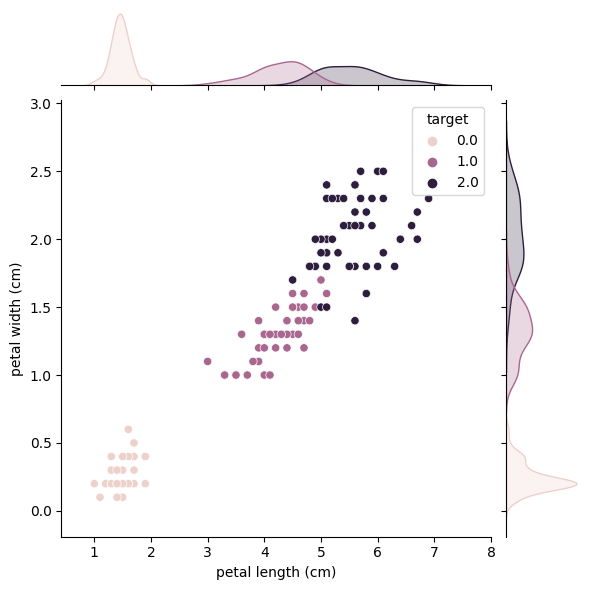

In [30]:
sns.jointplot(x = "petal length (cm)", y = "petal width (cm)", kind = "scatter", hue = 'target', data = df_iris)

In [31]:
df = pd.DataFrame(data=iris['data'], columns=iris.feature_names)

# Renaming columns
df['x1'] = df['petal length (cm)']
df['x2'] = df['petal width (cm)']

df['y'] = iris.target
df['class'] = df['y'].replace(to_replace= [0, 1, 2], value = ['A', 'B', 'C'])

In [32]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),x1,x2,y,class
0,5.1,3.5,1.4,0.2,1.4,0.2,0,A
1,4.9,3.0,1.4,0.2,1.4,0.2,0,A
2,4.7,3.2,1.3,0.2,1.3,0.2,0,A
3,4.6,3.1,1.5,0.2,1.5,0.2,0,A
4,5.0,3.6,1.4,0.2,1.4,0.2,0,A


## Training and Visualizing a Decision Tree

In [33]:
#pip install graphviz

In [34]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Where to save the figures
import os
PROJECT_ROOT_DIR = ".." 
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

In [35]:
from sklearn.tree import DecisionTreeClassifier

X = df[['x1', 'x2']]
y = df[['y']]

tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

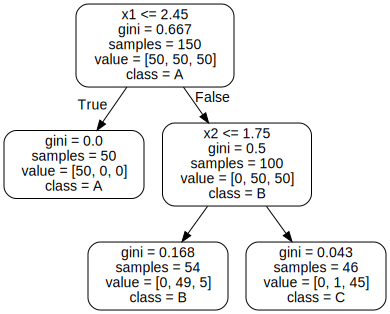

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

out_f = "BDTs_viz_tree.dot"

export_graphviz(
    tree_clf,
    out_file = os.path.join(IMAGES_PATH, out_f),
    feature_names = ['x1', 'x2'],
    class_names = ['A', 'B', 'C'],
    rounded = True,
    filled = False
)

Source.from_file(os.path.join(IMAGES_PATH, out_f))

## Decision Tree Boundaries

/home/claire/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


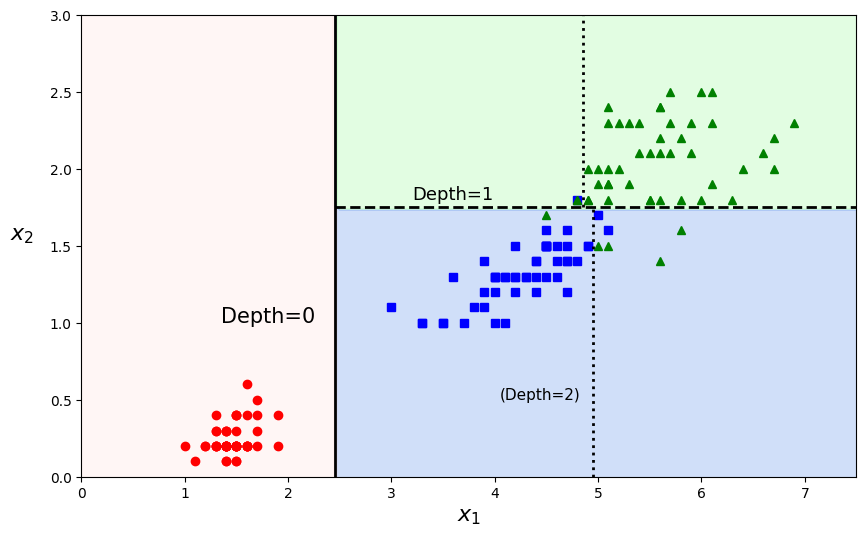

In [37]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], xlabel=r"$x_1$", ylabel=r"$x_2$", legend=False, plot_training=True):
    
    # Get a grid of values
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(["mistyrose",'cornflowerblue','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
   
    if plot_training:
        plt.plot(X.iloc[:, 0][y.y==0], X.iloc[:, 1][y.y==0], "ro", label="A")
        plt.plot(X.iloc[:, 0][y.y==1], X.iloc[:, 1][y.y==1], "bs", label="B")
        plt.plot(X.iloc[:, 0][y.y==2], X.iloc[:, 1][y.y==2], "g^", label="C")

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16, rotation=0 , labelpad=20)
    
    if legend:
        plt.legend(loc="lower right", fontsize=16)

        
fig = plt.figure(figsize=(10, 6))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.35, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

glue("dt_boundary_1", fig, display=False)

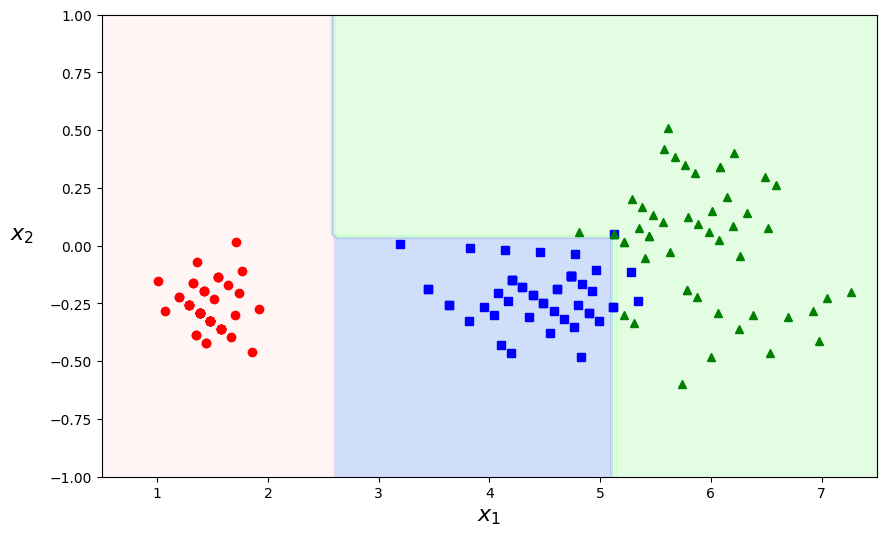

In [43]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

fig = plt.figure(figsize=(10, 6))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1])
glue("dt_boundary_r", fig, display=False)

In [39]:
#X.to_numpy()
#y.to_numpy()

In [44]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

/home/claire/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


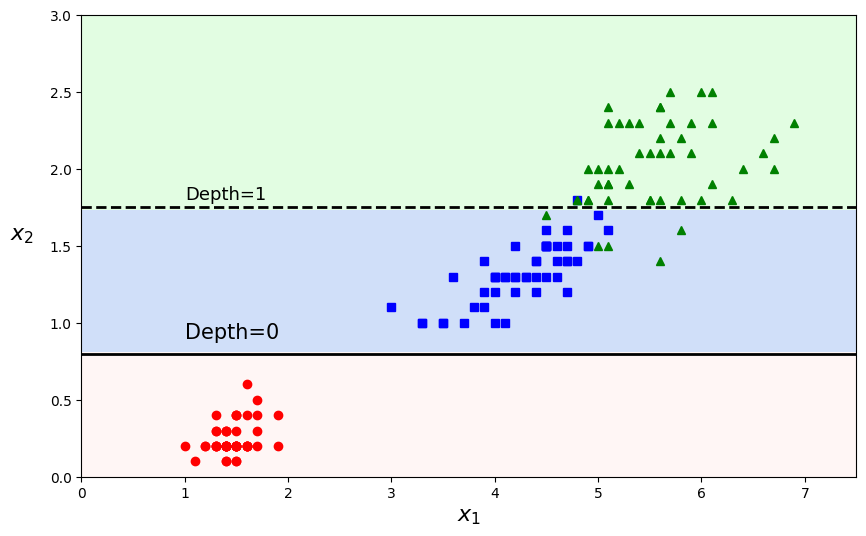

In [46]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)
fig = plt.figure(figsize=(10,6))
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
glue("dt_boundary_tweaked", fig, display=False)

In [42]:
print("Done")

Done
